In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# What is Exploratory Data Analysis (EDA)?

Exploratory Data Analysis (EDA) is the process of understanding the structure, patterns, and relationships in a dataset through summary statistics and visualizations .

It is the first step in any data science or data analysis project , and helps you:

- Understand the data
- Identify missing values and outliers
- Discover trends and patterns
- Formulate hypotheses for further analysis

# Why EDA is Important?

1. Understand Data Structure
    - What columns are available?
    - What is the data type of each column?
    - How many rows are there?

2. Check for Missing Values
    - Which columns have missing data?
    - How to handle missing values (impute or drop)?

3. Identify Outliers
    - Are there extreme values that need to be handled?

4. Visualize Trends
    - Funding trends over time
    - Top sectors, cities, startups
    - Investor behavior

5. Prepare for Modeling
    - Feature engineering
    - Data cleaning
    - Insights for stakeholders

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Set style
sns.set(style='whitegrid')


# Step-by-Step Plan

Step:1   Load and inspect the dataset

Step:2   Clean and preprocess the data

Step:3   Analyze funding trends over time

Step:4   Identify top funded sectors, cities, startups

Step:5   Analyze investor behavior

Step:6   Analyze investment types and stages

Step:7   Correlation analysis

Step:8   Identify funding outliers and growth trends

Step:9   Advanced analysis ( funding stage, investor types etc)

# 1. Load and Inspect the Dataset

Objective: Understand the structure and initial data quality.

In [ ]:
def readcsv(filepath,filename):
	import os
	os.chdir(filepath)
	file = pd.read_excel(filename)

	return file

filepath = "/content/drive/MyDrive/indianstartup"
filename = "startup_funding.xlsx"

df = readcsv(filepath,filename)
#print(df.head(3))

In [ ]:
print(pd.DataFrame(df.head(3)))

   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Private Equity   
2  Kashyap Deorah, Anand Sankeshwar, Deepak Jain,...    Seed Funding   

   Amount_In_INR Remarks  
0      1300000.0     NaN  
1            NaN     NaN  
2            NaN     NaN  


In [ ]:
# Inspect first few rows
print("First 5 rows:")
print(df.head())

# Basic info
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

First 5 rows:
   SNo                 Date   StartupName  Industry_Vertical  \
0    0  2017-01-08 00:00:00      TouchKin         Technology   
1    1  2017-02-08 00:00:00       Ethinos         Technology   
2    2  2017-02-08 00:00:00  Leverage Edu  Consumer Internet   
3    3  2017-02-08 00:00:00          Zepo  Consumer Internet   
4    4  2017-02-08 00:00:00  Click2Clinic  Consumer Internet   

                                     SubVertical City_Location  \
0                       Predictive Care Platform     Bangalore   
1                       Digital Marketing Agency        Mumbai   
2  Online platform for Higher Education Services     New Delhi   
3                         DIY Ecommerce platform        Mumbai   
4                  healthcare service aggregator     Hyderabad   

                                      Investors_Name  InvestmentType  \
0                                        Kae Capital  Private Equity   
1                         Triton Investment Advisors  Privat

In [ ]:
df.InvestmentType.unique()

array(['Private Equity', 'Seed Funding', 'Debt Funding', nan,
       'SeedFunding', 'PrivateEquity', 'Crowd funding', 'Crowd Funding'],
      dtype=object)

# Step 2: Clean and Preprocess the Data

Objective: Prepare the dataset for analysis by handling missing values, standardizing names, and normalizing funding amounts.

Explanation:

- Columns are cleaned and standardized.
- Missing values are filled with appropriate defaults.
- Date column is converted to datetime and used to extract year and month.
- Funding amounts are normalized to INR using a custom function.
- Missing funding values are filled with median to avoid distortion.

In [ ]:
# Rename columns to avoid spaces
#df.columns = df.columns.str.strip().str.replace(' ', '_').str.replace('/', '_')

In [ ]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'Industry_Vertical', 'SubVertical',
       'City_Location', 'Investors_Name', 'InvestmentType', 'Amount_In_INR',
       'Remarks'],
      dtype='object')

In [ ]:
# Fill missing values
df['Industry_Vertical'] = df['Industry_Vertical'].fillna('Others')
df['SubVertical'] = df['SubVertical'].fillna('Not Specified')
df['City_Location'] = df['City_Location'].fillna('Not Specified')
df['Investors_Name'] = df['Investors_Name'].fillna('Undisclosed')


In [ ]:
# Convert date column to datetime and extract year/month
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

In [ ]:
# Apply the function to the Amount column
df['Amount_In_INR'] = df['Amount_In_INR'].fillna(df['Amount_In_INR'].median())


In [ ]:
# Save cleaned data
df.to_csv("cleaned_startup_funding.csv", index=False)

# Step 3: Funding Trends Over Time

Objective: Analyze how funding has evolved year-over-year and month-over-month.

Explanation:

- A countplot shows the number of funding deals over the years.
- A line plot shows total funding amount per year, helping identify growth or decline trends.



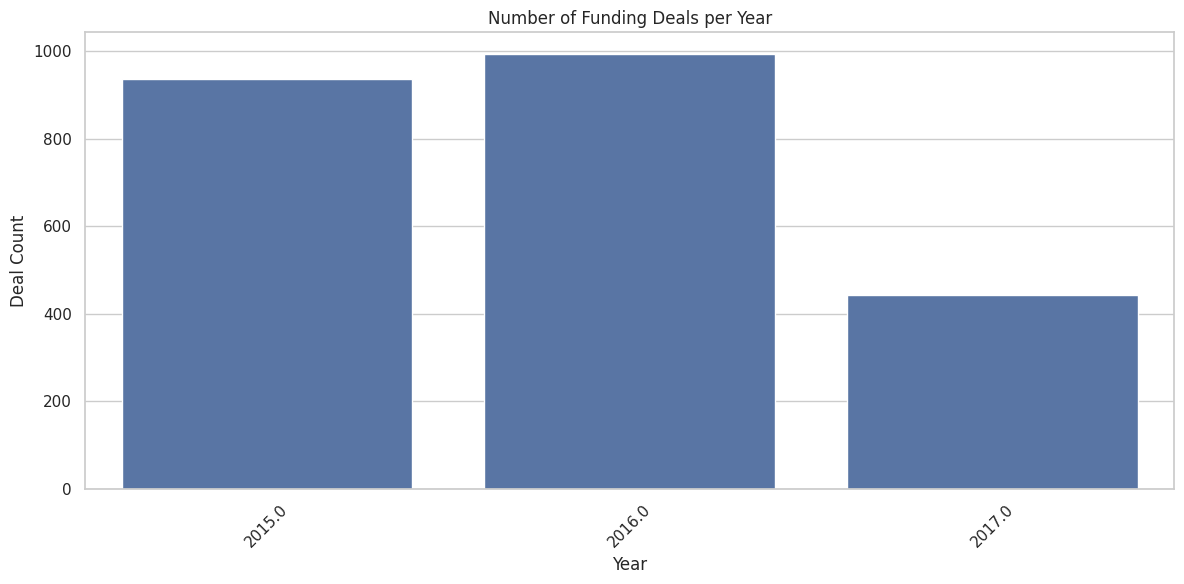

In [ ]:
# Number of deals per year
plt.figure(figsize=(12, 6))
sns.countplot(x='Year', data=df)
plt.title("Number of Funding Deals per Year")
plt.xlabel("Year")
plt.ylabel("Deal Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

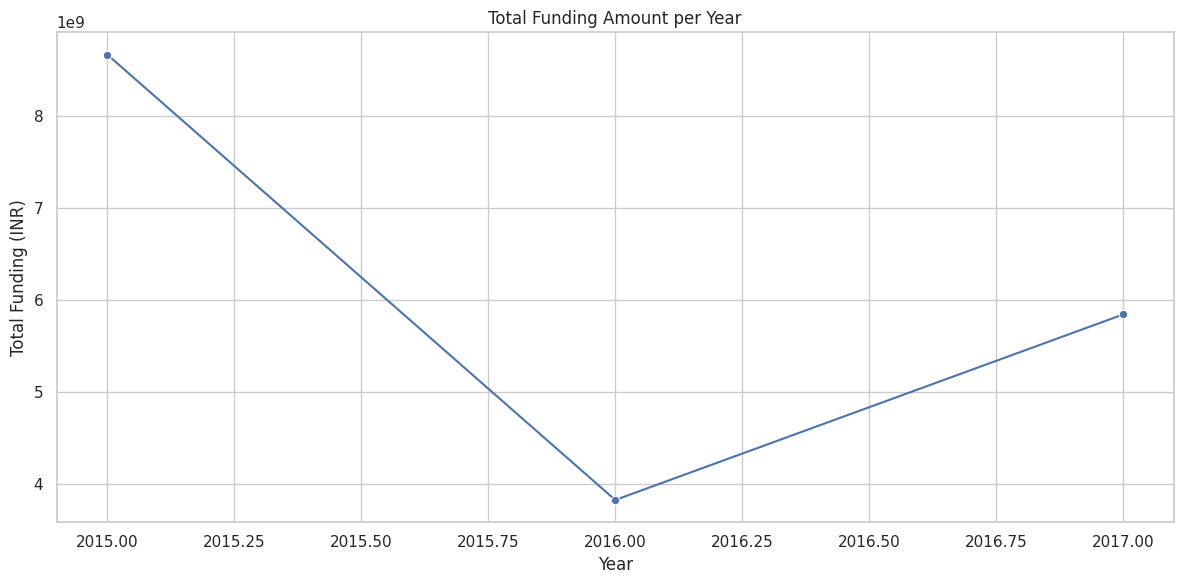

In [ ]:
# Total funding per year
yearly_funding = df.groupby('Year')['Amount_In_INR'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(x='Year', y='Amount_In_INR', data=yearly_funding, marker='o')
plt.title("Total Funding Amount per Year")
plt.xlabel("Year")
plt.ylabel("Total Funding (INR)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Top Funded Sectors, Cities, and Startups

Objective: Identify the most funded sectors, cities, and startups.

Explanation:

- Bar charts show which sectors, cities, and startups are receiving the most attention and funding.

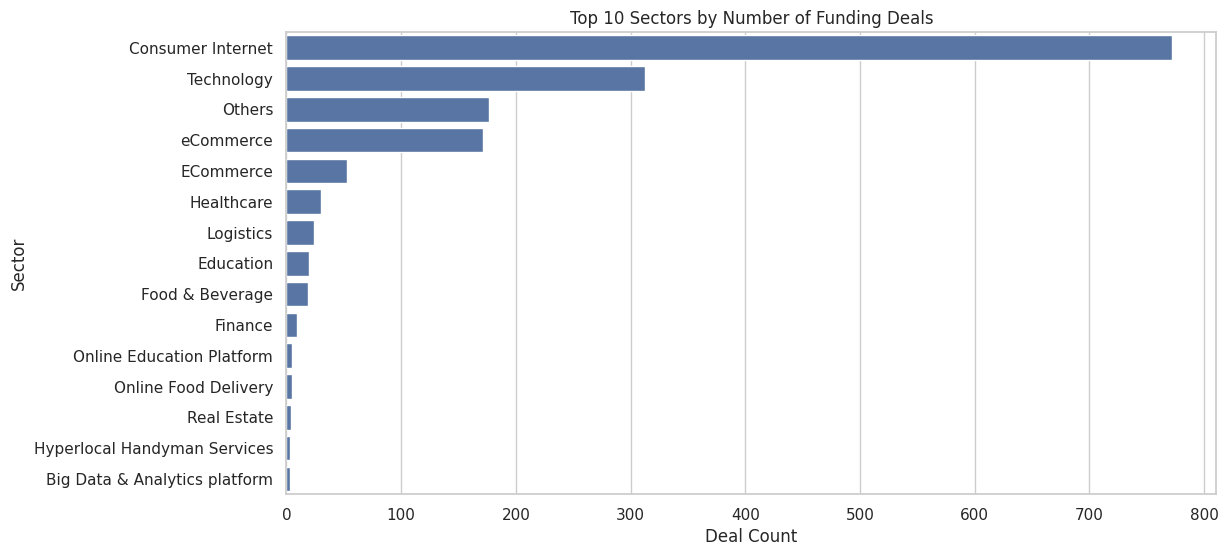

In [ ]:
# Top sectors by deal count
top_sectors = df['Industry_Vertical'].value_counts().head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_sectors.values, y=top_sectors.index)
plt.title("Top 10 Sectors by Number of Funding Deals")
plt.xlabel("Deal Count")
plt.ylabel("Sector")
plt.show()

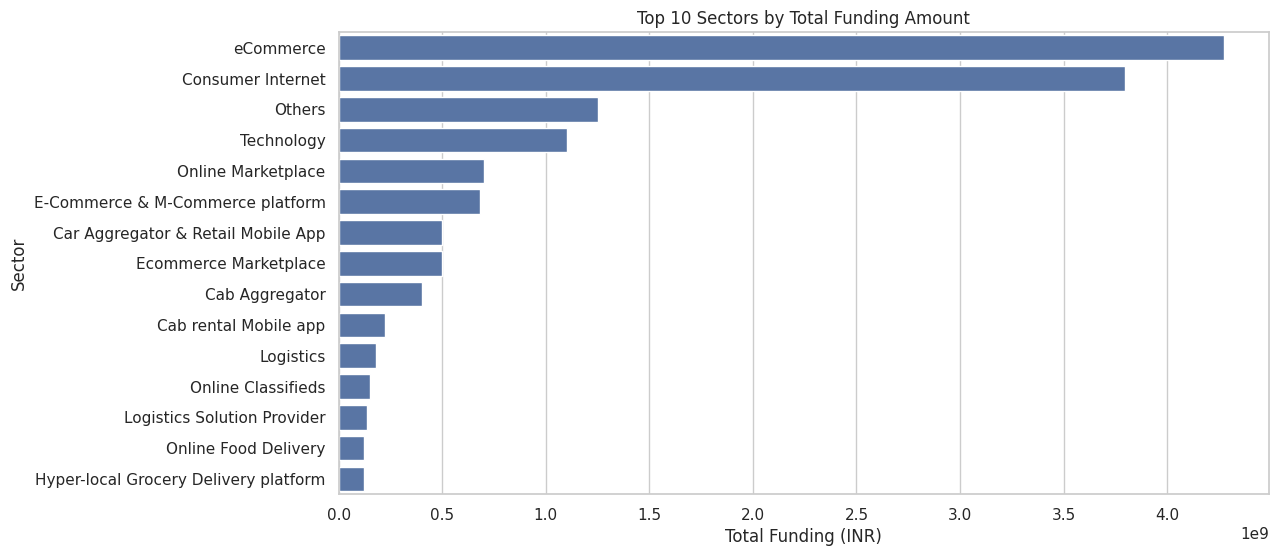

In [ ]:
# Top sectors by total funding
df['Industry_Vertical'] = df['Industry_Vertical'].replace({'ECommerce': 'eCommerce'})
sector_funding = df.groupby('Industry_Vertical')['Amount_In_INR'].sum().sort_values(ascending=False).head(15)
plt.figure(figsize=(12, 6))
sns.barplot(x=sector_funding.values, y=sector_funding.index)
plt.title("Top 10 Sectors by Total Funding Amount")
plt.xlabel("Total Funding (INR)")
plt.ylabel("Sector")
plt.show()

# Step 5: Investor Analysis

Objective: Understand which investors are most active and which sectors they invest in.

Explanation:

- Investors are split into individual names.
- Top investors are identified by number of deals and total funding.

In [ ]:
# Split multiple investors and count
investors_df = df[['StartupName', 'Investors_Name', 'Amount_In_INR']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
#investors_df

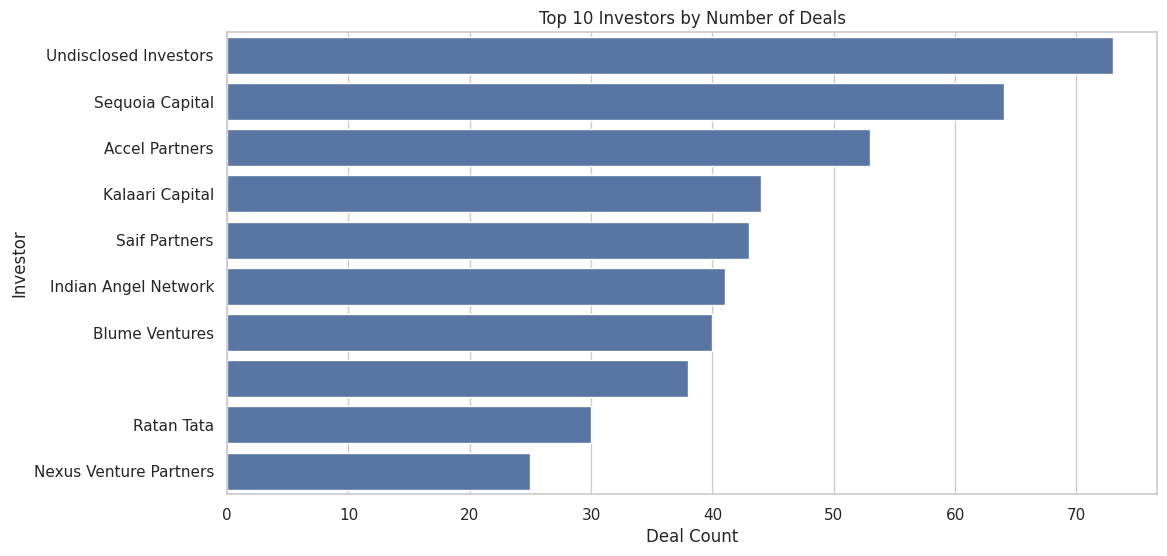

In [ ]:
# Top investors by number of deals
top_investors_deals = investors_df['Investors_Name'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_investors_deals.values, y=top_investors_deals.index)
plt.title("Top 10 Investors by Number of Deals")
plt.xlabel("Deal Count")
plt.ylabel("Investor")
plt.show()

Step 6: Investment Type Analysis

Objective: Understand the types of investments (Seed, Series A, etc.)

Explanation:

- This helps identify the stage of startups receiving the most funding.

In [ ]:
df.columns

Index(['SNo', 'Date', 'StartupName', 'Industry_Vertical', 'SubVertical',
       'City_Location', 'Investors_Name', 'InvestmentType', 'Amount_In_INR',
       'Remarks', 'Year', 'Month'],
      dtype='object')

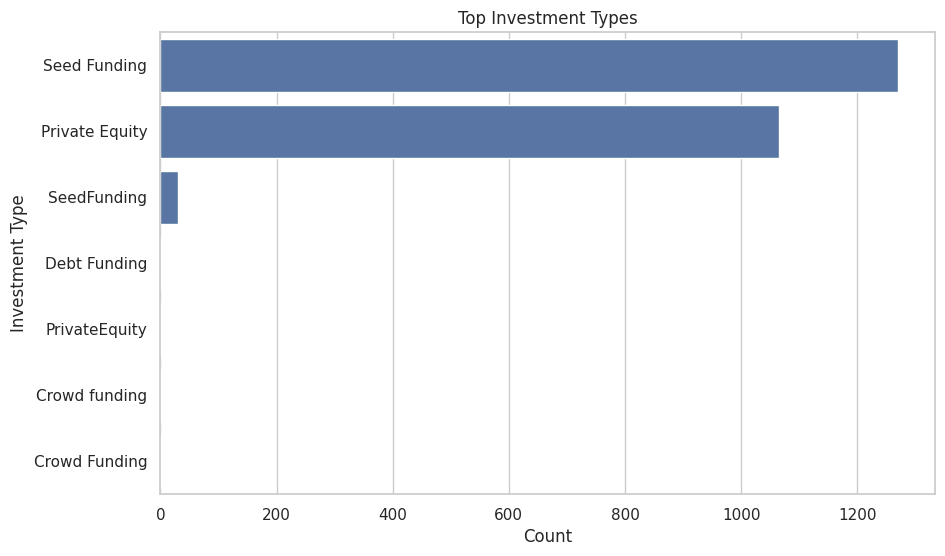

In [ ]:
investment_type = df['InvestmentType'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=investment_type.values, y=investment_type.index)
plt.title("Top Investment Types")
plt.xlabel("Count")
plt.ylabel("Investment Type")
plt.show()

# Step 7: Correlation Between Sector and Investment Type

Objective: See which sectors attract which types of funding.

Explanation:

- A heatmap shows which sectors are dominated by which investment types.

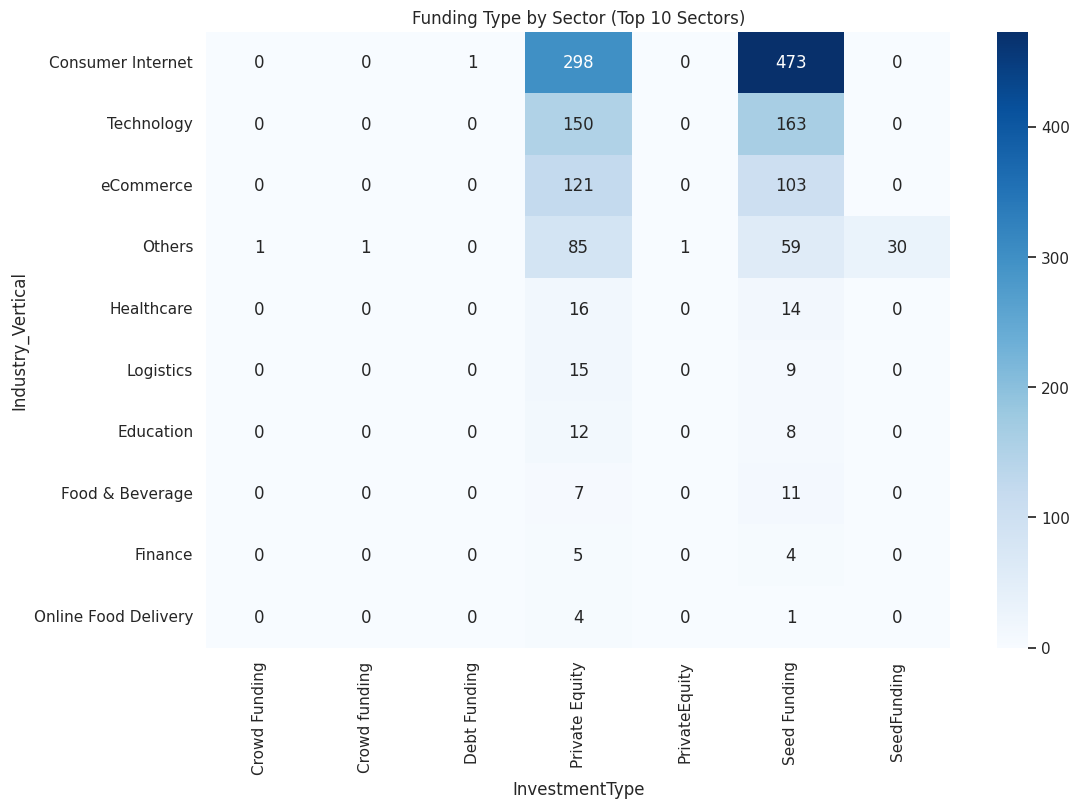

In [ ]:
sector_stage = pd.crosstab(df['Industry_Vertical'], df['InvestmentType'])
sector_stage = sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]

plt.figure(figsize=(12, 8))
sns.heatmap(sector_stage, annot=True, fmt="d", cmap="Blues")
plt.title("Funding Type by Sector (Top 10 Sectors)")
plt.show()

# Step 8: Funding Distribution and Outliers

Objective: Understand how funding is distributed and identify outliers.

Explanation:

- Histogram and boxplot help understand skewness and identify outliers like Paytm or Flipkart.

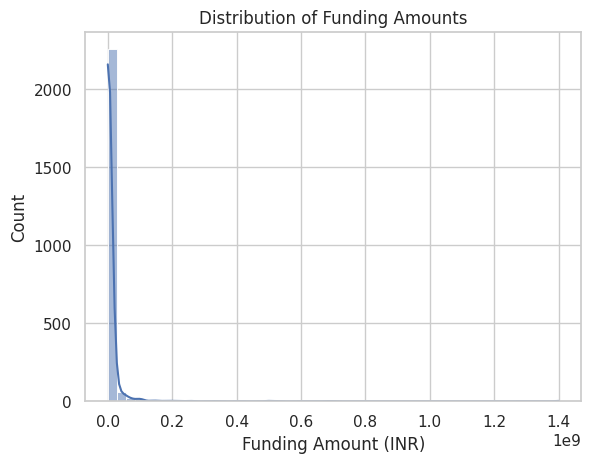

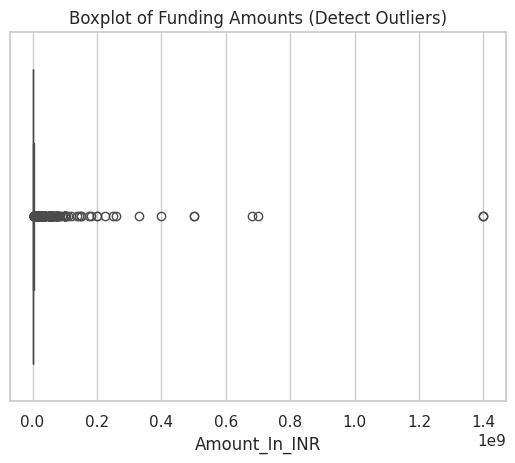

In [ ]:
sns.histplot(df['Amount_In_INR'], bins=50, kde=True)
plt.title("Distribution of Funding Amounts")
plt.xlabel("Funding Amount (INR)")
plt.show()

sns.boxplot(x=df['Amount_In_INR'])
plt.title("Boxplot of Funding Amounts (Detect Outliers)")
plt.show()

# Step 9: Growth Trend of Top Sectors

Objective: Identify sectors with the highest growth potential.

Explanation:

- Helps identify emerging sectors that may offer future opportunities.

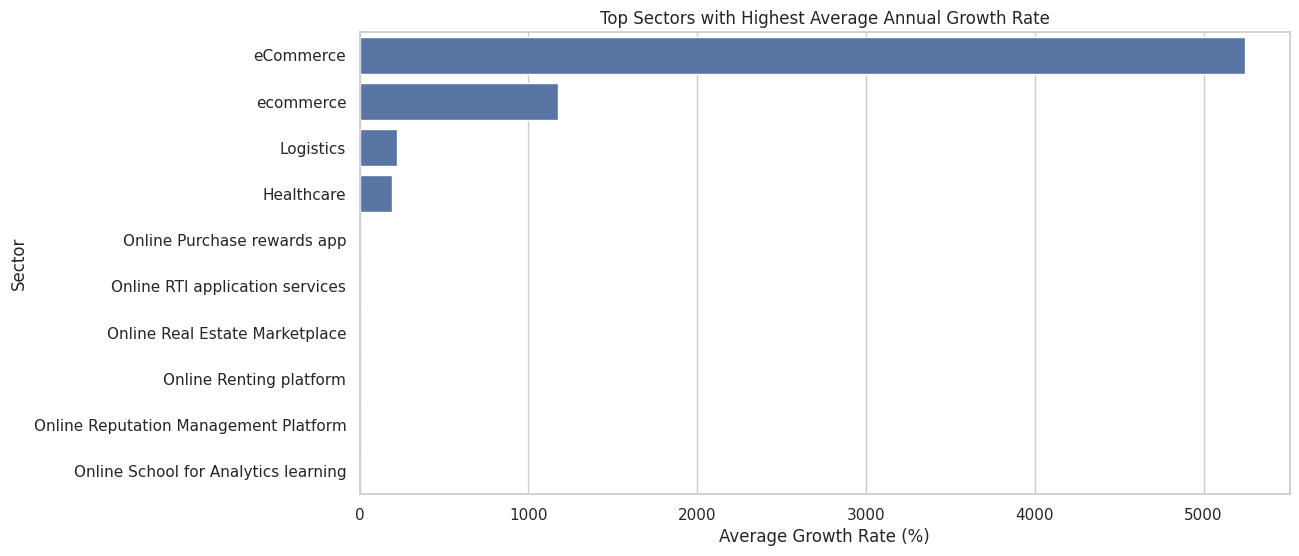

In [ ]:
sector_yearly = df.groupby(['Year', 'Industry_Vertical'])['Amount_In_INR'].sum().unstack()#.fillna(0)
sector_growth = sector_yearly.pct_change().mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=sector_growth.values * 100, y=sector_growth.index)
plt.title("Top Sectors with Highest Average Annual Growth Rate")
plt.xlabel("Average Growth Rate (%)")
plt.ylabel("Sector")
plt.show()

In [ ]:
sector_yearly

Industry_Vertical,360-degree view creating platform,3D Printer Manufacturer,API Workflow platform,Activity Based Social Network,Advertising & Marketing Community Networking platform,Affordable Education,Affordable Hotel Booking Online,Algorithmic Match Making Platform,Alternate Mobile Monetization platform,App Analytics platform,...,online recipe sharing platform,online tiffin service aggregator,pre-owned Luxury online apparel seller,pre-used apparel shopping mobile app,pre-used luxury item Marketplace,proximity marketing & Mobile Advertising platform,residential rental management platform,solar products and services marketplace,"virtual reality, 3d simulation and stereoscopic products",visual search and discovery platform
Year,,,,,,,,,,,,,,,,,,,,,
2015.0,1070000.0,3000000.0,1000000.0,1070000.0,1000000.0,650000.0,5000000.0,1070000.0,5000000.0,500000.0,...,1070000.0,1070000.0,1070000.0,1000000.0,1070000.0,80000.0,640000.0,1070000.0,800000.0,1000000.0
2016.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Step 10: Advanced Analysis

Goal: Add more depth to the analysis with:

- Investor type distribution
- Startup funding trajectory
- Repeat investment analysis

1. Investor Type Distribution

Goal: Classify investors into types like VC , Angel , Corporate , etc.

Explanation:
- Investors are split into individual names.
- Investor names are classified using keyword matching.
- A bar chart shows the number of deals per investor type.

In [ ]:
investors_df = df[['StartupName', 'Investors_Name', 'Amount_In_INR']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
def classify_investor(name):
    name = name.lower()
    if any(word in name for word in ['capital', 'ventures', 'partners', 'fund', 'vc', 'labs']):
        return 'VC'
    elif any(word in name for word in ['angel', 'network']):
        return 'Angel'
    elif any(word in name for word in ['corp', 'limited', 'pvt', 'ltd', 'inc']):
        return 'Corporate'
    else:
        return 'Other'


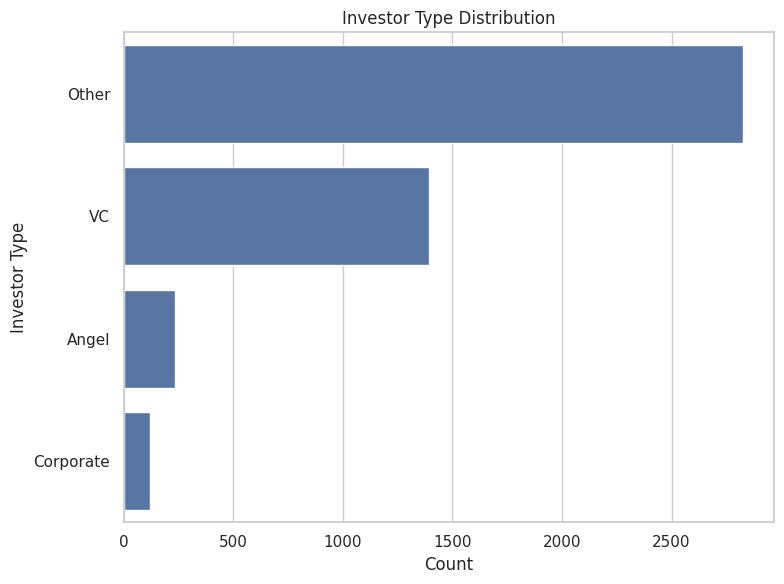

In [ ]:
investors_df['Investor_Type'] = investors_df['Investors_Name'].apply(classify_investor)
investor_type_counts = investors_df['Investor_Type'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=investor_type_counts.values, y=investor_type_counts.index)
plt.title("Investor Type Distribution")
plt.xlabel("Count")
plt.ylabel("Investor Type")
plt.tight_layout()
plt.show()

2. Startup Funding Trajectory

Goal: Track how top startups grew in terms of funding over time.

Explanation:
- Startups are grouped by name and year.
- Cumulative funding is calculated.
- A line plot shows the funding growth of the top 5 startups over time.

In [ ]:
# Group by startup and year, then compute cumulative funding
startup_growth = df.groupby(['StartupName', 'Year'])['Amount_In_INR'].sum().unstack().fillna(0).cumsum()

# Select top 5 funded startups
top_startups = startup_growth.sum(axis=1).sort_values(ascending=False).head(5).index


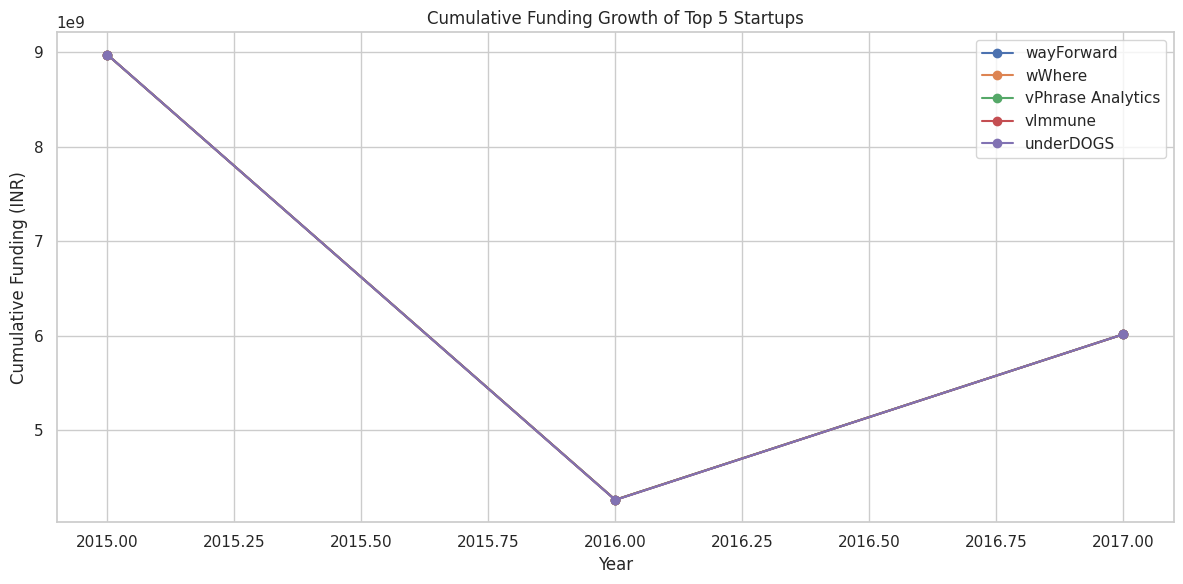

In [ ]:
plt.figure(figsize=(12, 6))
for startup in top_startups:
    plt.plot(startup_growth.loc[startup].index, startup_growth.loc[startup].values, label=startup, marker='o')

plt.title("Cumulative Funding Growth of Top 5 Startups")
plt.xlabel("Year")
plt.ylabel("Cumulative Funding (INR)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

3. Repeat Investment Analysis

Goal: Identify investors who invest in the same startup multiple times.

Explanation:
- Investors are split into individual names.
- We count how many times an investor invested in the same startup.
- A bar chart shows the top investors who repeatedly invest in the same startups.

In [ ]:
investors_df = df[['StartupName', 'Investors_Name']].copy()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.split(',')
investors_df = investors_df.explode('Investors_Name').dropna()
investors_df['Investors_Name'] = investors_df['Investors_Name'].str.strip().str.title()

In [ ]:
# Count how many times an investor invested in the same startup
investor_startup_count = investors_df.groupby(['Investors_Name', 'StartupName']).size().reset_index(name='DealCount')
repeat_investors = investor_startup_count[investor_startup_count['DealCount'] > 1]

repeat_investor_summary = repeat_investors['Investors_Name'].value_counts().head(10)


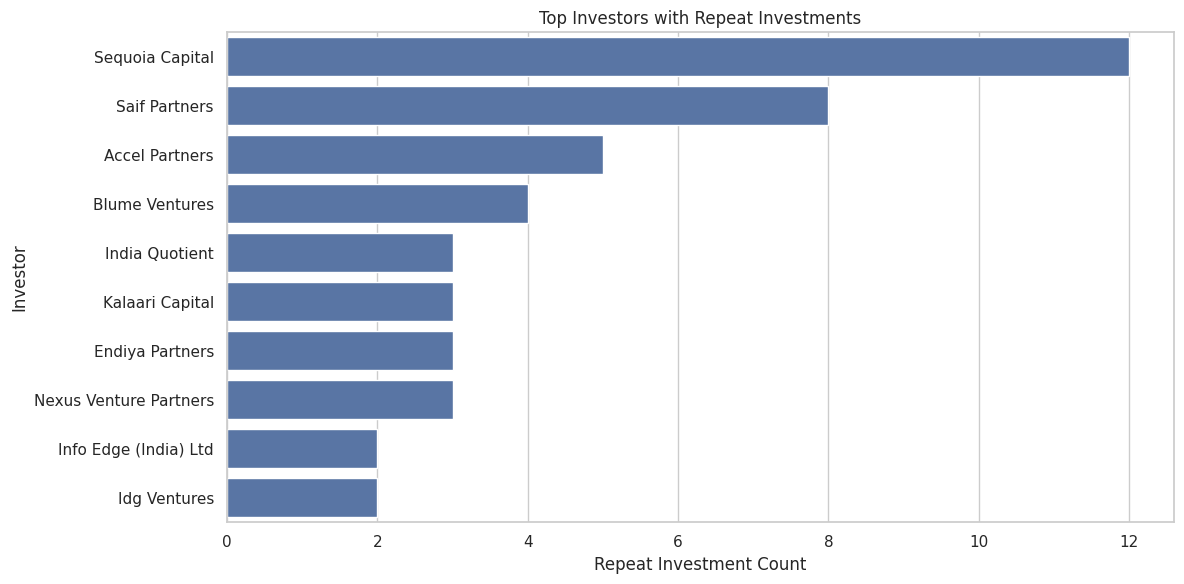

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=repeat_investor_summary.values, y=repeat_investor_summary.index)
plt.title("Top Investors with Repeat Investments")
plt.xlabel("Repeat Investment Count")
plt.ylabel("Investor")
plt.tight_layout()
plt.show()

Funding Stage Analysis

Objective:
Understand how many startups are in early-stage (Seed, Angel) vs late-stage (Series A+, Private Equity, Venture Debt) funding.

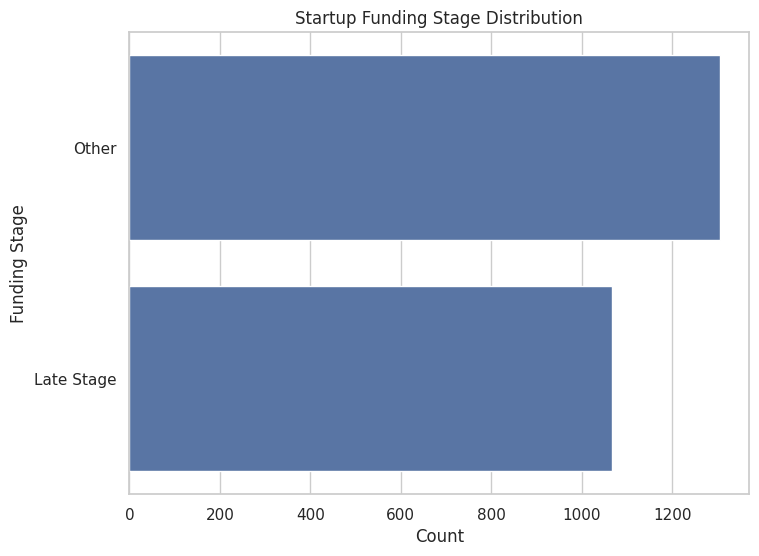

In [ ]:
# Define stage categories
early_stage = ['Seed', 'Pre-Seed', 'Angel']
late_stage = ['Series A', 'Series B', 'Series C', 'Series D', 'Series E', 'Private Equity', 'Venture Debt', 'Debt Funding']
df['Funding_Stage'] = df['InvestmentType'].str.strip().str.title()
df['Funding_Stage'] = df['Funding_Stage'].apply(
    lambda x: 'Early Stage' if x in early_stage else ('Late Stage' if x in late_stage else 'Other')
)

# Plot
plt.figure(figsize=(8, 6))
sns.countplot(y='Funding_Stage', data=df, order=df['Funding_Stage'].value_counts().index)
plt.title("Startup Funding Stage Distribution")
plt.xlabel("Count")
plt.ylabel("Funding Stage")
plt.show()

Funding Type vs Sector (Stacked Bar Chart)

Objective:
Understand which investment types are most common in each sector.

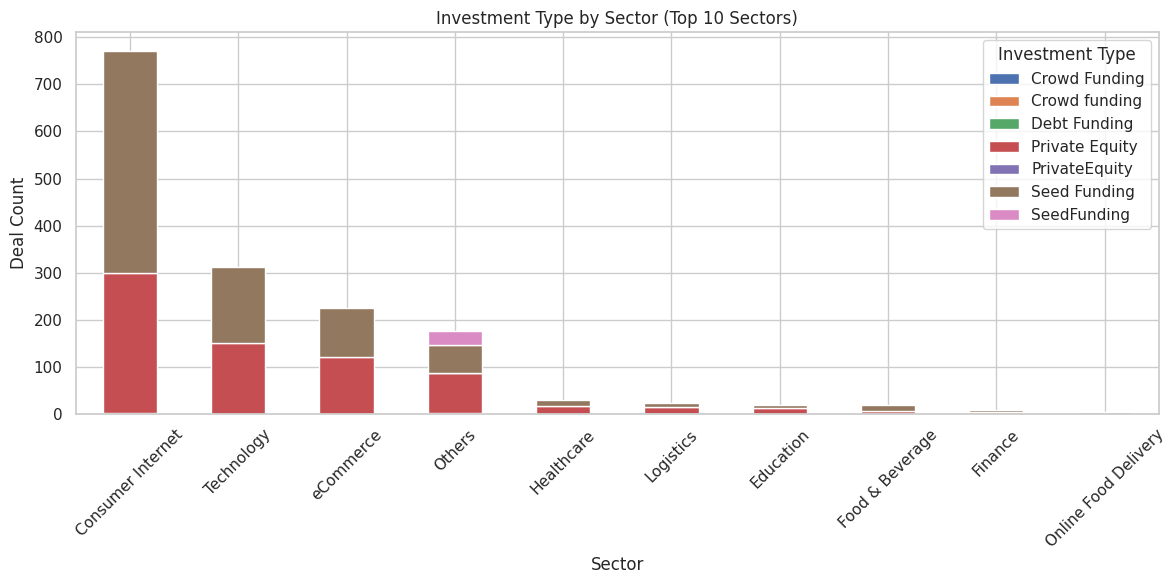

In [ ]:
sector_stage = pd.crosstab(df['Industry_Vertical'], df['InvestmentType'])
sector_stage = sector_stage.loc[sector_stage.sum(axis=1).sort_values(ascending=False).head(10).index]

sector_stage.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Investment Type by Sector (Top 10 Sectors)")
plt.xlabel("Sector")
plt.ylabel("Deal Count")
plt.xticks(rotation=45)
plt.legend(title="Investment Type")
plt.tight_layout()
plt.show()

Top Startups with Multiple Funding Rounds

Objective: Identify startups that raised multiple rounds of funding .

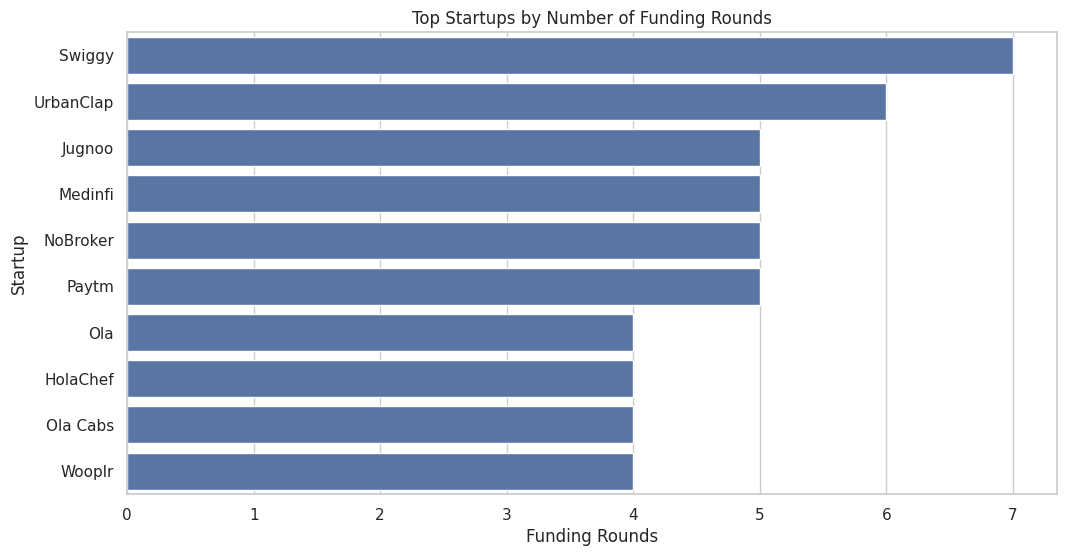

In [ ]:
startup_rounds = df.groupby('StartupName').size().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=startup_rounds.values, y=startup_rounds.index)
plt.title("Top Startups by Number of Funding Rounds")
plt.xlabel("Funding Rounds")
plt.ylabel("Startup")
plt.show()

Funding by Month (Seasonality)

Objective:
Check if funding activity is seasonal.

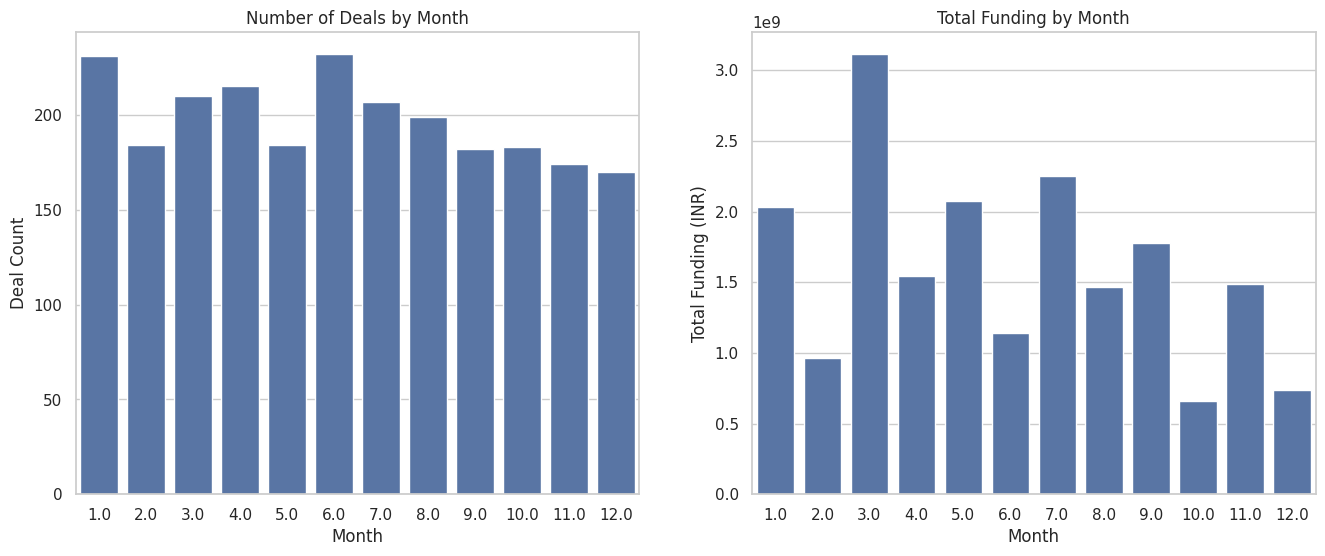

In [ ]:
df['Month'] = df['Date'].dt.month
monthly_deals = df['Month'].value_counts().sort_index()
monthly_funding = df.groupby('Month')['Amount_In_INR'].sum()

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
sns.barplot(x=monthly_deals.index, y=monthly_deals.values, ax=ax[0])
ax[0].set_title("Number of Deals by Month")
ax[0].set_xlabel("Month")
ax[0].set_ylabel("Deal Count")

sns.barplot(x=monthly_funding.index, y=monthly_funding.values, ax=ax[1])
ax[1].set_title("Total Funding by Month")
ax[1].set_xlabel("Month")
ax[1].set_ylabel("Total Funding (INR)")
plt.show()

### Funding Gap: Undisclosed vs Disclosed

Objective: Understand how many funding deals had undisclosed amounts.

NOTE: Load data again because we imputed "Amount_In_INR" with median. Undisclosed amount is empty values

In [ ]:
def readcsv(filepath,filename):
	import os
	os.chdir(filepath)
	file = pd.read_excel(filename)

	return file

filepath = "/content/drive/MyDrive/KLE Collage, Khanapur/Indian Startup"
filename = "startup_funding.xlsx"

df1 = readcsv(filepath,filename)

Undisclosed Deals: 847
Disclosed Deals: 1525


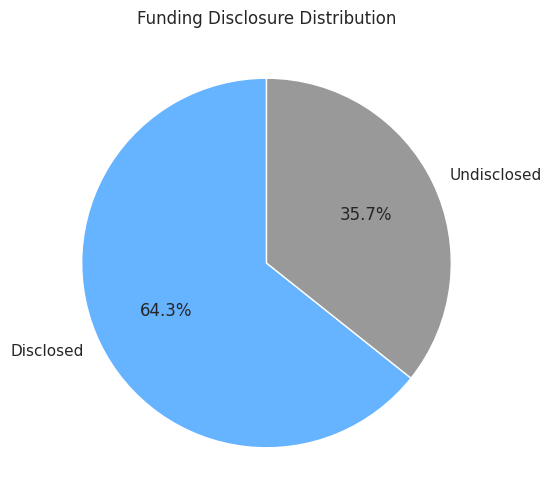

In [ ]:
undisclosed_deals = df1[df1['Amount_In_INR'].isna()]
disclosed_deals = df1[df1['Amount_In_INR'].notna()]

print(f"Undisclosed Deals: {len(undisclosed_deals)}")
print(f"Disclosed Deals: {len(disclosed_deals)}")

labels = ['Disclosed', 'Undisclosed']
sizes = [len(disclosed_deals), len(undisclosed_deals)]
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#999999'])
plt.title("Funding Disclosure Distribution")
plt.show()

# Assignment 1: Funding Trends Over Time

🎯 Objective: Analyze funding trends over time (yearly and monthly) to understand growth and seasonality.

📝 Tasks:
- Plot number of funding deals per year
- Plot total funding amount per year
- Plot deals and funding by month

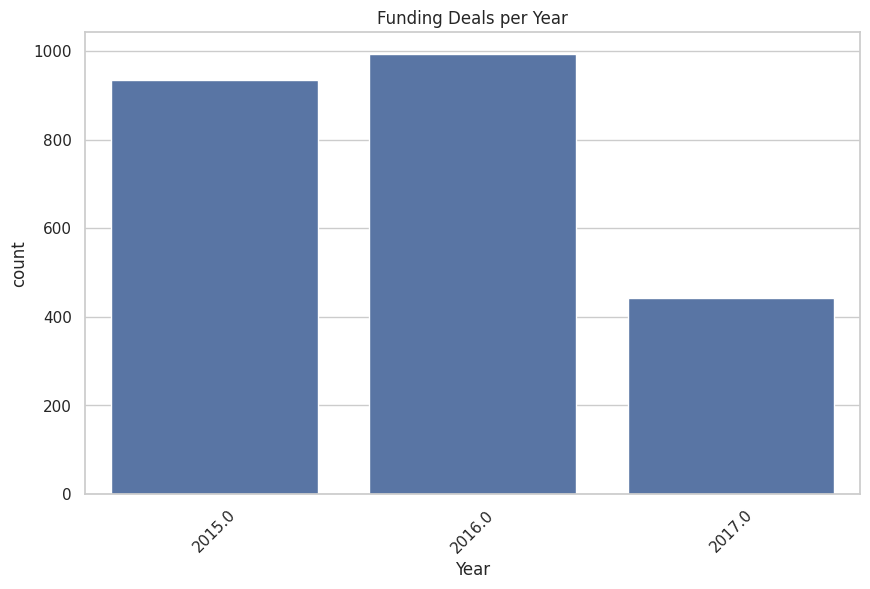

In [ ]:
# Deals per year
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)
plt.title("Funding Deals per Year")
plt.xticks(rotation=45)
plt.show()

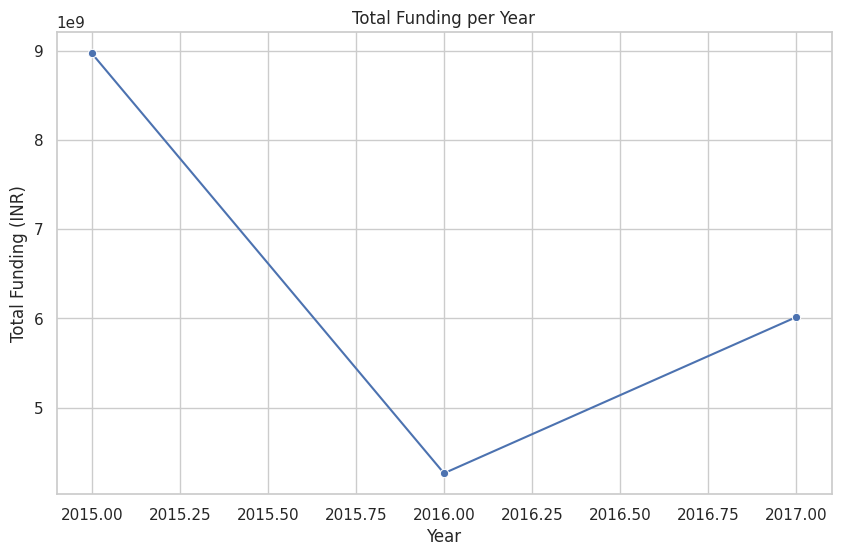

In [ ]:
# Total funding per year
yearly_funding = df.groupby('Year')['Amount_In_INR'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='Year', y='Amount_In_INR', data=yearly_funding, marker='o')
plt.title("Total Funding per Year")
plt.xlabel("Year")
plt.ylabel("Total Funding (INR)")
plt.grid(True)
plt.show()

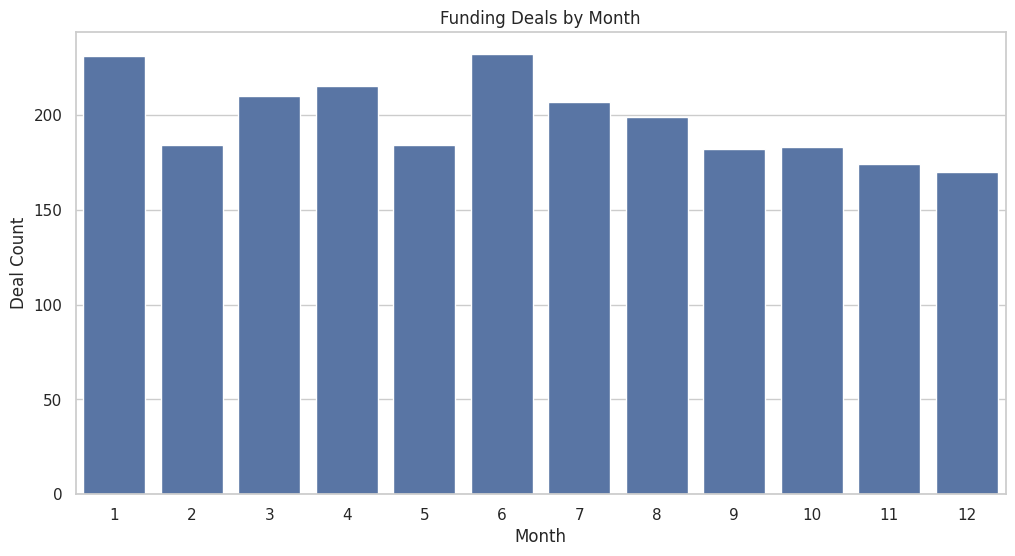

In [ ]:
# Deals per month
monthly_deals = df.groupby('Month').size().reindex(range(1,13), fill_value=0)
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_deals.index, y=monthly_deals.values)
plt.title("Funding Deals by Month")
plt.xlabel("Month")
plt.ylabel("Deal Count")
plt.show()

# Assignment 2: Top Funded Sectors and Cities

🎯 Objective: Identify the most funded sectors and cities in India.

📝 Tasks:
- Find top 10 sectors by deal count and total funding
- Find top 10 cities by deal count and total funding
- Plot bar charts for each

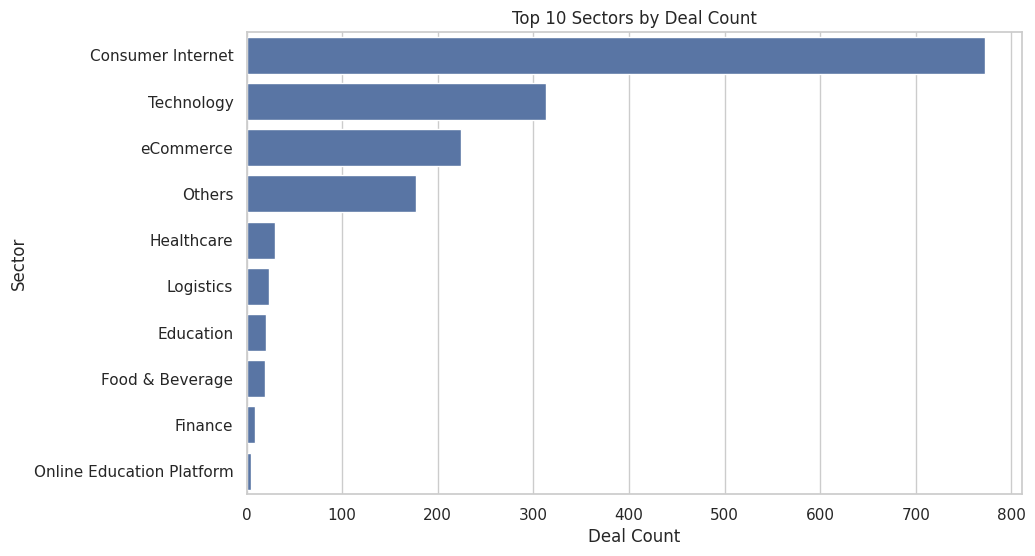

In [ ]:
# Top sectors by deal count
top_sectors = df['Industry_Vertical'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sectors.values, y=top_sectors.index)
plt.title("Top 10 Sectors by Deal Count")
plt.xlabel("Deal Count")
plt.ylabel("Sector")
plt.show()



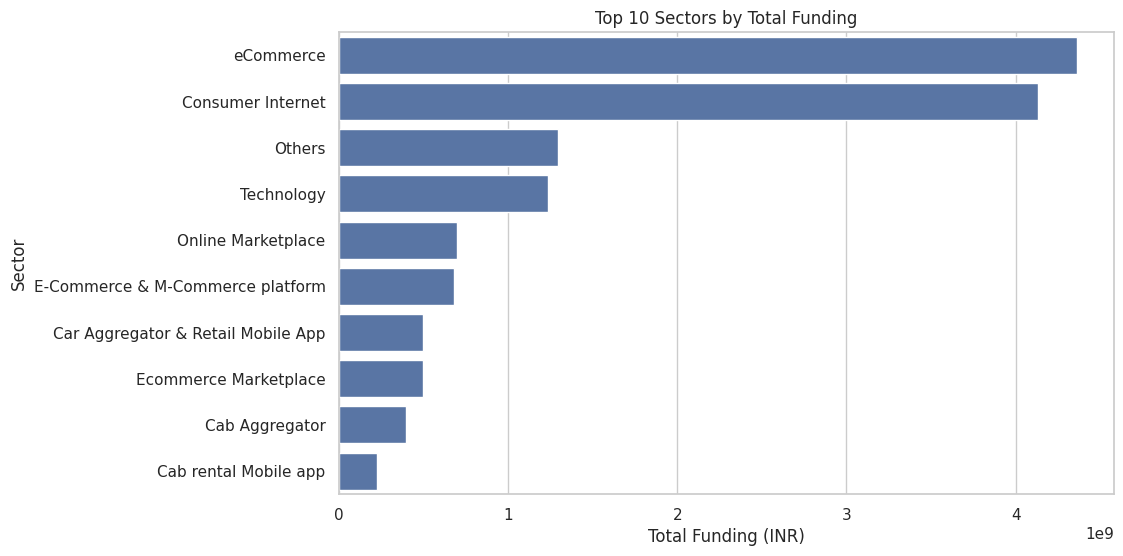

In [ ]:
# Top sectors by funding
sector_funding = df.groupby('Industry_Vertical')['Amount_In_INR'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=sector_funding.values, y=sector_funding.index)
plt.title("Top 10 Sectors by Total Funding")
plt.xlabel("Total Funding (INR)")
plt.ylabel("Sector")
plt.show()



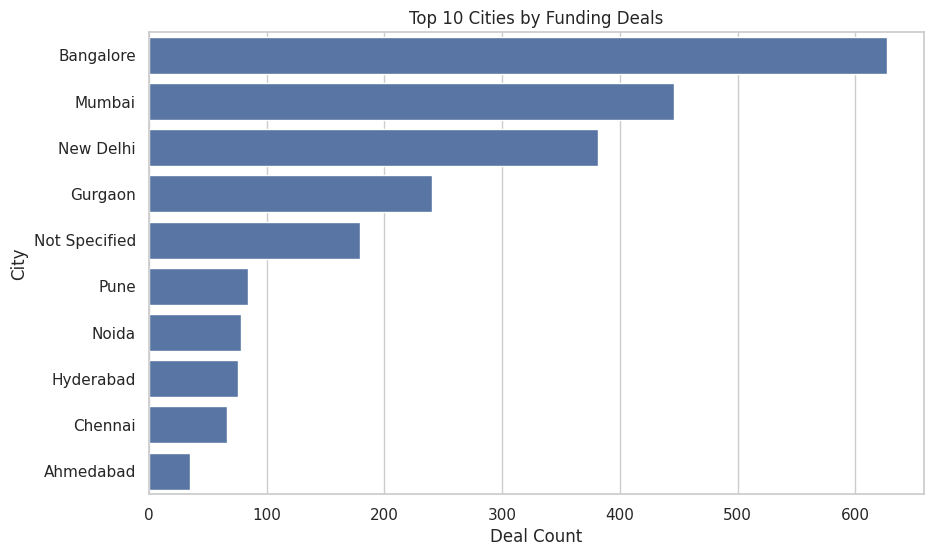

In [ ]:
# Top cities
top_cities = df['City_Location'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title("Top 10 Cities by Funding Deals")
plt.xlabel("Deal Count")
plt.ylabel("City")
plt.show()